# Emma's A3 Assignment

In [1]:
import numpy as np;
import scipy as sp;
from sklearn import tree;
from sklearn.neighbors import KNeighborsClassifier;
from sklearn.linear_model import LogisticRegression;
from sklearn.cross_validation import cross_val_score;
from sklearn import svm;

from pandas import DataFrame, read_csv # Importing specific library functions

import matplotlib.pyplot as plt # Importing library but no functions + give nickname
import pandas as pd #this is how I usually import pandas

# Enable inline plotting
%matplotlib inline

#Tutorial: http://nbviewer.jupyter.org/urls/bitbucket.org/hrojas/learn-pandas/raw/master/lessons/01%20-%20Lesson.ipynb
#Intro to pandas and datastructures: http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/

In [2]:
# Load in the data
walk_location = r'/Users/emma/Downloads/heather_data/walking.csv'
walk_raw = pd.read_csv(walk_location)
drive_location = r'/Users/emma/Downloads/heather_data/driving.csv'
drive_raw = pd.read_csv(drive_location)
static_location = r'/Users/emma/Downloads/heather_data/static.csv'
static_raw = pd.read_csv(static_location)
upstairs_location = r'/Users/emma/Downloads/heather_data/upstair.csv'
upstairs_raw = pd.read_csv(upstairs_location)
run_location = r'/Users/emma/Downloads/heather_data/running.csv'
run_raw = pd.read_csv(run_location)

In [3]:
# http://stackoverflow.com/questions/17315737/split-a-large-pandas-dataframe
# input - df: a Dataframe, chunkSize: the chunk size
# output - a list of DataFrame
# purpose - splits the DataFrame into smaller of max size chunkSize (last may be smaller)
def splitDataFrameIntoSmaller(df, chunkSize = 1000): 
    listOfDf = list()
    numberChunks = len(df) // chunkSize + 1
    for i in range(numberChunks):
        listOfDf.append(df[i*chunkSize:(i+1)*chunkSize])
    return listOfDf

In [4]:
# Set up the 10-second chunks
walk_chunked = splitDataFrameIntoSmaller(walk_raw)
for idx, df in enumerate(walk_chunked):
    walk_chunked[idx] = pd.DataFrame(df)
    
drive_chunked = splitDataFrameIntoSmaller(drive_raw)
for idx, df in enumerate(drive_chunked):
    drive_chunked[idx] = pd.DataFrame(df)
    
static_chunked = splitDataFrameIntoSmaller(static_raw)
for idx, df in enumerate(static_chunked):
    static_chunked[idx] = pd.DataFrame(df)

upstairs_chunked = splitDataFrameIntoSmaller(upstairs_raw)
for idx, df in enumerate(upstairs_chunked):
    upstairs_chunked[idx] = pd.DataFrame(df)    
    
run_chunked = splitDataFrameIntoSmaller(run_raw)
for idx, df in enumerate(run_chunked):
    run_chunked[idx] = pd.DataFrame(df)

In [5]:
# This is where the feature data will go. The array for each activity will have length 30.
walk_featured = []
drive_featured = []
static_featured = []
upstairs_featured = []
run_featured = []

# Populate the features
for df in walk_chunked:
    features = df.mean().values.tolist() + df.std().values.tolist()
    walk_featured.append(features)
    
for df in drive_chunked:
    features = df.mean().values.tolist() + df.std().values.tolist()
    drive_featured.append(features)
    
for df in static_chunked:
    features = df.mean().values.tolist() + df.std().values.tolist()
    static_featured.append(features)
    
for df in upstairs_chunked:
    features = df.mean().values.tolist() + df.std().values.tolist()
    upstairs_featured.append(features)
    
for df in run_chunked:
    features = df.mean().values.tolist() + df.std().values.tolist()
    run_featured.append(features)

In [6]:
# Combine all of the feature sets into one big one. Along the way, generate my target array.
all_featured = walk_featured + drive_featured + static_featured + upstairs_featured + run_featured
target = [] + [0] * len(walk_featured)
target = target + [1] * len(drive_featured)
target = target + [2] * len(static_featured)
target = target + [3] * len(upstairs_featured)
target = target + [4] * len(run_featured)

if target.count(0) != 30 or target.count(1) != 30 or target.count(2) != 30 or target.count(3) != 30 or target.count(4) != 30:
    raise ValueError('Target is corrupt')

In [7]:
# Create and run cross-validation on a K-Nearest Neighbors classifier
knn = KNeighborsClassifier()
knn_scores = cross_val_score(knn, all_featured, target, cv = 5)
print 'K-NEAREST NEIGHBORS CLASSIFIER'
print knn_scores

K-NEAREST NEIGHBORS CLASSIFIER
[ 1.  1.  1.  1.  1.]


In [8]:
# Create and run cross-validation on a Logistic Regression classifier
lr = LogisticRegression()
lr_scores = cross_val_score(lr, all_featured, target, cv = 5)
print 'LOGISTIC REGRESSION CLASSIFIER'
print lr_scores

LOGISTIC REGRESSION CLASSIFIER
[ 0.9  1.   1.   1.   1. ]


In [9]:
# Create and run cross-validation on a Decision Tree classifier
svc = svm.SVC(kernel='linear')
svc_scores = cross_val_score(svc, all_featured, target, cv = 5)
print 'DECISION TREE CLASSIFIER'
print svc_scores

DECISION TREE CLASSIFIER
[ 1.  1.  1.  1.  1.]


In [10]:
# Create and run cross-validation on a Support Vector Machine classifier
dtree = tree.DecisionTreeClassifier()
dtree_scores = cross_val_score(dtree, all_featured, target, cv = 5)
print 'SUPPORT VECTOR MACHINE CLASSIFIER'
print dtree_scores

SUPPORT VECTOR MACHINE CLASSIFIER
[ 1.          1.          1.          1.          0.96666667]


In [11]:
# Beginning to figure out features
print walk_raw[['attitude_yaw']].describe()[2:3]
print run_raw[['attitude_yaw']].describe()[2:3]
print static_raw[['attitude_yaw']].describe()[2:3]
print upstairs_raw[['attitude_yaw']].describe()[2:3]
print drive_raw[['attitude_yaw']].describe()[2:3]

     attitude_yaw
std      1.066812
     attitude_yaw
std      1.867349
     attitude_yaw
std      0.007585
     attitude_yaw
std      1.911433
     attitude_yaw
std      2.119805


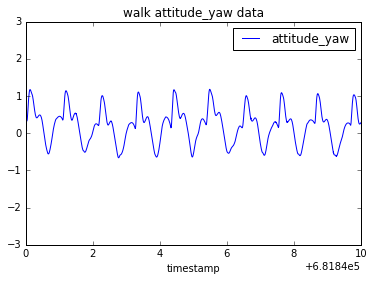

In [12]:
walk_raw.plot(x='timestamp', y='attitude_yaw', title='walk attitude_yaw data', ylim=(-3,3), xlim= (681840,681850))

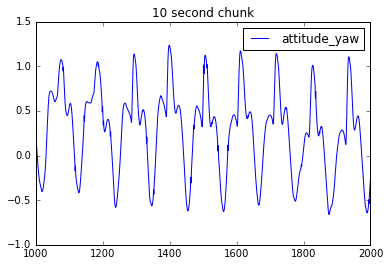

In [13]:
# Plotting one chunk (10 seconds) of walking data
chunk = walk_raw[['attitude_yaw']][1000:2000]
chunk.plot(title='10 second chunk')

In [14]:
# Reformat the chunk
formatted_chunk = chunk.as_matrix().tolist() # Get it out of pandas DataFrame format
formatted_chunk = [item[0] for item in formatted_chunk]

array([  2.82199299e+02,   5.29524606e+01,   3.56962573e+01,
         3.01778813e+01,   2.74633986e+01,   1.82258724e+01,
         3.19238456e+01,   3.53291591e+01,   6.42140723e+01,
         2.60162887e+02,   9.50629593e+01,   2.12943102e+01,
         1.95754477e+01,   1.20952157e+01,   3.41742156e+00,
         1.44789746e+01,   5.78638076e+00,   6.43244691e+00,
         2.58215810e+01,   4.90251382e+01,   2.08399646e+00,
         1.09826860e+01,   1.29166147e+01,   9.09049594e+00,
         7.25624990e+00,   3.06326186e+00,   8.06942322e+00,
         2.01960119e+01,   1.11054920e+02,   2.02056041e+01,
         1.73884840e+01,   1.59560855e+01,   6.37551794e+00,
         4.30784746e+00,   3.97522505e+00,   6.63813000e+00,
         1.45004215e+01,   3.29551424e+01,   2.57213060e+01,
         5.44691339e+00,   6.77216081e+00,   8.99970862e+00,
         7.92819581e+00,   1.82010030e+00,   5.40305605e+00,
         5.38904823e+00,   1.04845764e+01,   2.24882380e+01,
         3.33797044e+00,

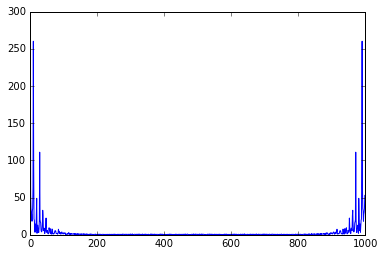

In [15]:
# Do a Fast Fourier Transform on attitude_yaw, chop off low frequency stuff
walk_fft = np.abs(np.fft.fft(formatted_chunk)) # Taking absolute value gives us the magnitude
plt.plot(walk_fft)
walk_fft

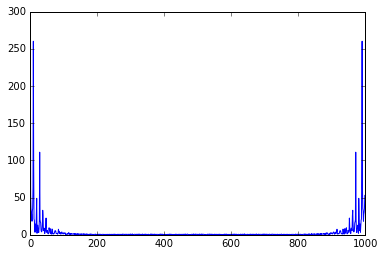

In [16]:
#walk_fft = [elem for elem in walk_fft if elem > 800]
# walk_fft = walk_fft[800:] # Low pass filter
plt.plot(walk_fft)

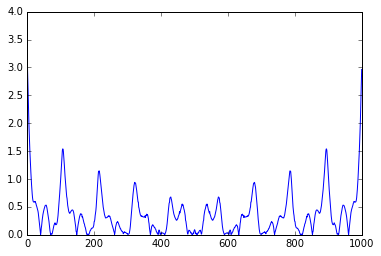

In [17]:
# Reverse the Fast Fourier Transform
walk_ifft = np.abs(np.fft.ifft(walk_fft))
plt.plot(walk_ifft)